In [11]:
import pandas as pd
import seaborn as sns

In [98]:
Police = pd.read_csv("C:\\Users\\ablyv\\Downloads\\Police.csv");
Police

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,NaN,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,NaN,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,NaN,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [99]:
Police.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

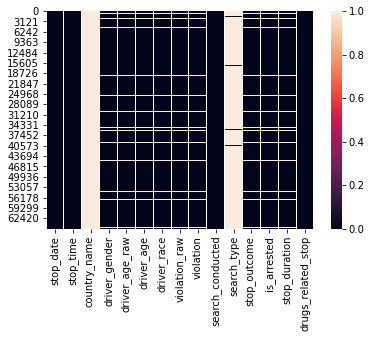

In [100]:
sns.heatmap(Police.isnull())

In [101]:
Police1=Police.drop(labels=["country_name","search_type","stop_date","stop_time","stop_duration","violation_raw"], axis=1, index=None, columns=None)

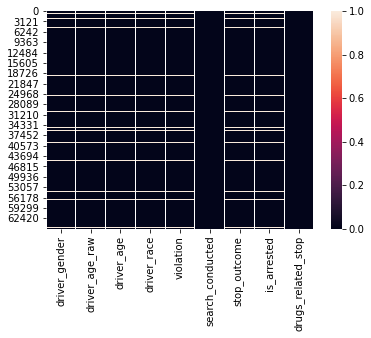

In [102]:
sns.heatmap(Police1.isnull())

In [103]:
Police1.rename(columns={"driver_gender": "gender"},inplace=True)

In [104]:
Police1.rename(columns={"is_arrested":"arrested"},inplace=True)

In [105]:
Police1

,gender,driver_age_raw,driver_age,driver_race,violation,search_conducted,stop_outcome,arrested,drugs_related_stop
0,M,1985.0,20.0,White,Speeding,False,Citation,False,False
1,M,1965.0,40.0,White,Speeding,False,Citation,False,False
2,M,1972.0,33.0,White,Speeding,False,Citation,False,False
3,M,1986.0,19.0,White,Other,False,Arrest Driver,True,False
4,F,1984.0,21.0,White,Speeding,False,Citation,False,False
...,...,...,...,...,...,...,...,...,...
65530,F,1987.0,25.0,White,Speeding,False,Citation,False,False
65531,M,1954.0,58.0,White,Speeding,False,Warning,False,False
65532,M,1985.0,27.0,Black,Equipment,False,Citation,False,False
65533,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False


In [106]:
Police1.violation.value_counts()

Speeding               37204
Moving violation       11926
Equipment               6516
Other                   3583
Registration/plates     2243
Seat belt                  3
Name: violation, dtype: int64

In [107]:
Police1.stop_outcome.value_counts()

Citation            56564
Arrest Driver        2009
Warning              1889
N/D                   423
No Action             339
Arrest Passenger      251
Name: stop_outcome, dtype: int64

In [108]:
Police1.replace(to_replace =[False, True], value =[0,1],inplace=True);# false=0, True =1;
Police1.replace(to_replace=["M","F"],value=[1,0],inplace=True);# Male marked as 1 and Female marked as 0.
Police1.replace(to_replace=["White","Black","Asian","Hispanic"],value=[0,1,2,3],inplace=True);#White=0 and Black=1;
Police1.replace(to_replace=["Speeding","Moving violation","Equipment","Other","Registration/plates","Seat belt"],value=[1,2,3,4,5,6],inplace=True);#White=0 and Black=1;
Police1.replace(to_replace=["Citation","Arrest Driver","Warning","N/D","No Action","Arrest Passenger"],value=[1,2,3,4,5,6],inplace=True);#White=0 and Black=1;

In [109]:
Police1

,gender,driver_age_raw,driver_age,driver_race,violation,search_conducted,stop_outcome,arrested,drugs_related_stop
0,1.0,1985.0,20.0,0.0,1.0,0,1.0,0.0,0
1,1.0,1965.0,40.0,0.0,1.0,0,1.0,0.0,0
2,1.0,1972.0,33.0,0.0,1.0,0,1.0,0.0,0
3,1.0,1986.0,19.0,0.0,4.0,0,2.0,1.0,0
4,0.0,1984.0,21.0,0.0,1.0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...
65530,0.0,1987.0,25.0,0.0,1.0,0,1.0,0.0,0
65531,1.0,1954.0,58.0,0.0,1.0,0,3.0,0.0,0
65532,1.0,1985.0,27.0,1.0,3.0,0,1.0,0.0,0
65533,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0


In [110]:
Police1.violation.value_counts()

1.0    37204
2.0    11926
3.0     6516
4.0     3583
5.0     2243
6.0        3
Name: violation, dtype: int64

In [111]:
Police1.stop_outcome.value_counts()

1.0    56564
2.0     2009
3.0     1889
4.0      423
5.0      339
6.0      251
Name: stop_outcome, dtype: int64

In [112]:
Police1.gender.value_counts()

1.0    45164
0.0    16310
Name: gender, dtype: int64

In [113]:
Police1=Police1.dropna()

In [114]:
Police1

,gender,driver_age_raw,driver_age,driver_race,violation,search_conducted,stop_outcome,arrested,drugs_related_stop
0,1.0,1985.0,20.0,0.0,1.0,0,1.0,0.0,0
1,1.0,1965.0,40.0,0.0,1.0,0,1.0,0.0,0
2,1.0,1972.0,33.0,0.0,1.0,0,1.0,0.0,0
3,1.0,1986.0,19.0,0.0,4.0,0,2.0,1.0,0
4,0.0,1984.0,21.0,0.0,1.0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...
65529,1.0,1994.0,18.0,0.0,1.0,0,1.0,0.0,0
65530,0.0,1987.0,25.0,0.0,1.0,0,1.0,0.0,0
65531,1.0,1954.0,58.0,0.0,1.0,0,3.0,0.0,0
65532,1.0,1985.0,27.0,1.0,3.0,0,1.0,0.0,0


In [115]:
Police1.isnull().sum()

gender                0
driver_age_raw        0
driver_age            0
driver_race           0
violation             0
search_conducted      0
stop_outcome          0
arrested              0
drugs_related_stop    0
dtype: int64

In [116]:
Police1.driver_race.value_counts()

0.0    45572
1.0     8223
3.0     5583
2.0     1634
4.0      210
Name: driver_race, dtype: int64

In [117]:
Police1.to_csv("Police_dataset.csv",encoding="utf-8",index=False)

In [93]:
Police1.driver_age_raw.value_counts()

1986.0    2702
1987.0    2645
1985.0    2629
1988.0    2587
1983.0    2339
          ... 
1926.0       4
1924.0       4
1923.0       3
1922.0       3
1918.0       1
Name: driver_age_raw, Length: 76, dtype: int64

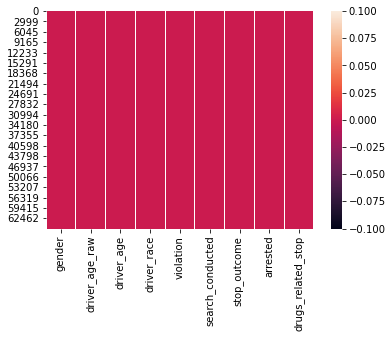

In [94]:
sns.heatmap(Police1.isnull())

In [ ]:
Police1.to_excel("Police_dataset.xls",encoding="utf-8",index=False)